### **Customer Churn Prediction Model**

This project focuses on predicting whether a telecom provider's customer will churn out. I have used the publicly available dataset from Kaggle. https://www.kaggle.com/competitions/customer-churn-prediction-2020/overview/description


The 19 input features and 1 target variable are:

"state", string. 2-letter code of the US state of customer residence \
"account_length", numerical. Number of months the customer has been with the current telco provider \
"area_code", string="area_code_AAA" where AAA = 3 digit area code \
"international_plan", (yes/no). The customer has international plan \
"voice_mail_plan", (yes/no). The customer has voice mail plan \
"number_vmail_messages", numerical. Number of voice-mail messages \
"total_day_minutes", numerical. Total minutes of day calls \
"total_day_calls", numerical. Total minutes of day calls \
"total_day_charge", numerical. Total charge of day calls \
"total_eve_minutes", numerical. Total minutes of evening calls \
"total_eve_calls", numerical. Total number of evening calls \
"total_eve_charge", numerical. Total charge of evening calls \
"total_night_minutes", numerical. Total minutes of night calls \
"total_night_calls", numerical. Total number of night calls \
"total_night_charge", numerical. Total charge of night calls \
"total_intl_minutes", numerical. Total minutes of international calls \
"total_intl_calls", numerical. Total number of international calls \
"total_intl_charge", numerical. Total charge of international calls \
"number_customer_service_calls", numerical. Number of calls to customer service \
"churn", (yes/no) - target variable 

In [327]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
%matplotlib inline

##### *Importing the training dataset and transforming the churn column into boolean values*

In [328]:
customer_data = pd.read_csv('train.csv')
new_col = range(1,customer_data.shape[0]+1)
customer_data.insert(loc=0, column='customer_id', value=new_col)
churn_numeric = {'yes':1, 'no':0}
customer_data.churn.replace(churn_numeric,inplace=True)
customer_data.head()



,customer_id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,5,MA,121,area_code_510,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [329]:
customer_data.shape

(4250, 21)

### **Data cleaning and sanity checks**

##### *Counting the NaN values in the Pandas DataFrame*

In [330]:
customer_data.isna().sum()

customer_id                      0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

##### *Counting the distribution of each class of customer churn*

In [331]:
customer_data.churn.value_counts().reset_index()

,index,churn
0,0,3652
1,1,598


The dataset has target variable distribution imbalance. The number of observations for the 'No churn' class is significantly lower than the 'Churn' class. Such an imbalance can impact the performance of the machine learning model. In order to bring balance to the distribution of classes of these variables, upsampling or downsampling can be used. Upsampling refers to manually adding data samples to the minority classes in order to create a more balanced dataset. I am using the resample() method from sklearn.utils module as shown below.

In [332]:
# creating a new dataframe called churn_yes_upsample

from sklearn.utils import resample
churn_no = customer_data[customer_data['churn'] == 0]
churn_yes = customer_data[customer_data['churn'] == 1]
churn_yes_upsample = resample(churn_yes, replace=True, n_samples=(len(churn_no) - len(churn_yes)),random_state=42)


In [333]:
# Adding rows from the new upsampled dataframe "churn_yes_upsample" 
customer_data = customer_data.append(churn_yes_upsample,ignore_index=False)

customer_data.shape

C:\Users\Niki\AppData\Local\Temp\ipykernel_20064\3224224210.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  customer_data = customer_data.append(churn_yes_upsample,ignore_index=False)


(7304, 21)

### **Exploratory Data Analysis**

##### *Visualizing the distribution of categorical variables*

c:\Users\Niki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Niki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Niki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='voice_mail_plan', ylabel='count'>

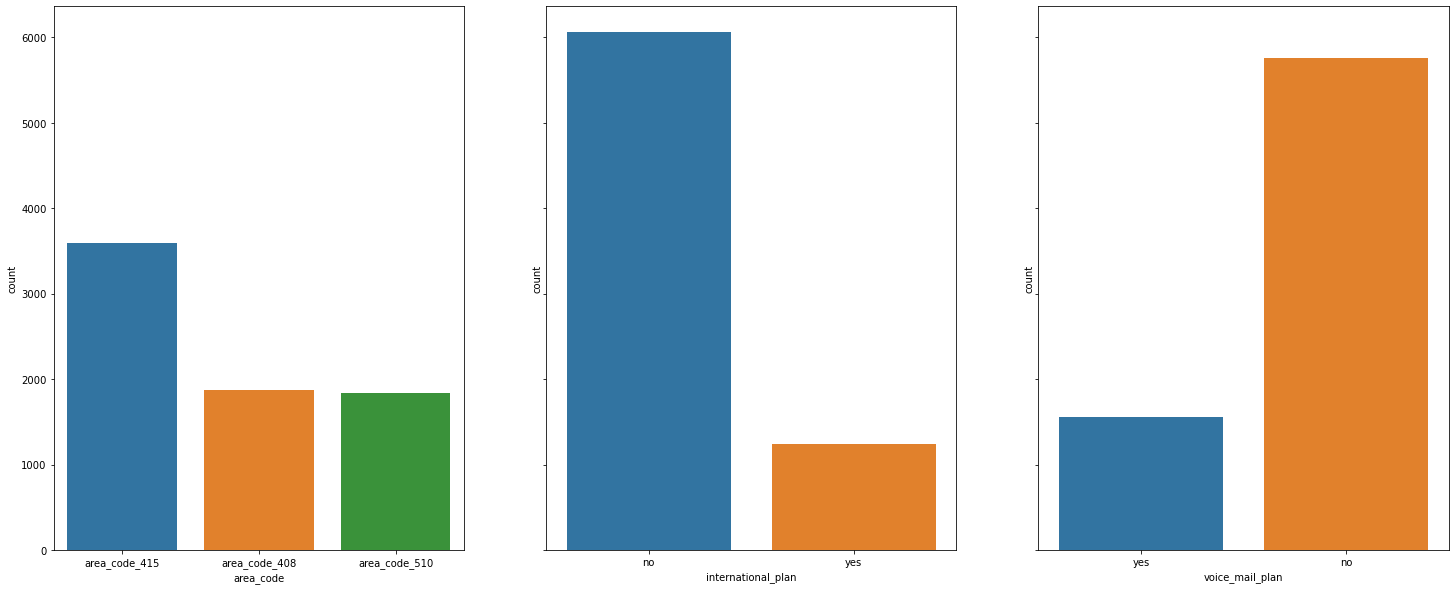

In [334]:
fig, axes = plt.subplots(1,3, figsize=(25,10),sharey=True)
sns.countplot("area_code", data=customer_data, ax=axes[0])
sns.countplot("international_plan", data=customer_data, ax=axes[1])
sns.countplot("voice_mail_plan", data=customer_data, ax=axes[2])

c:\Users\Niki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


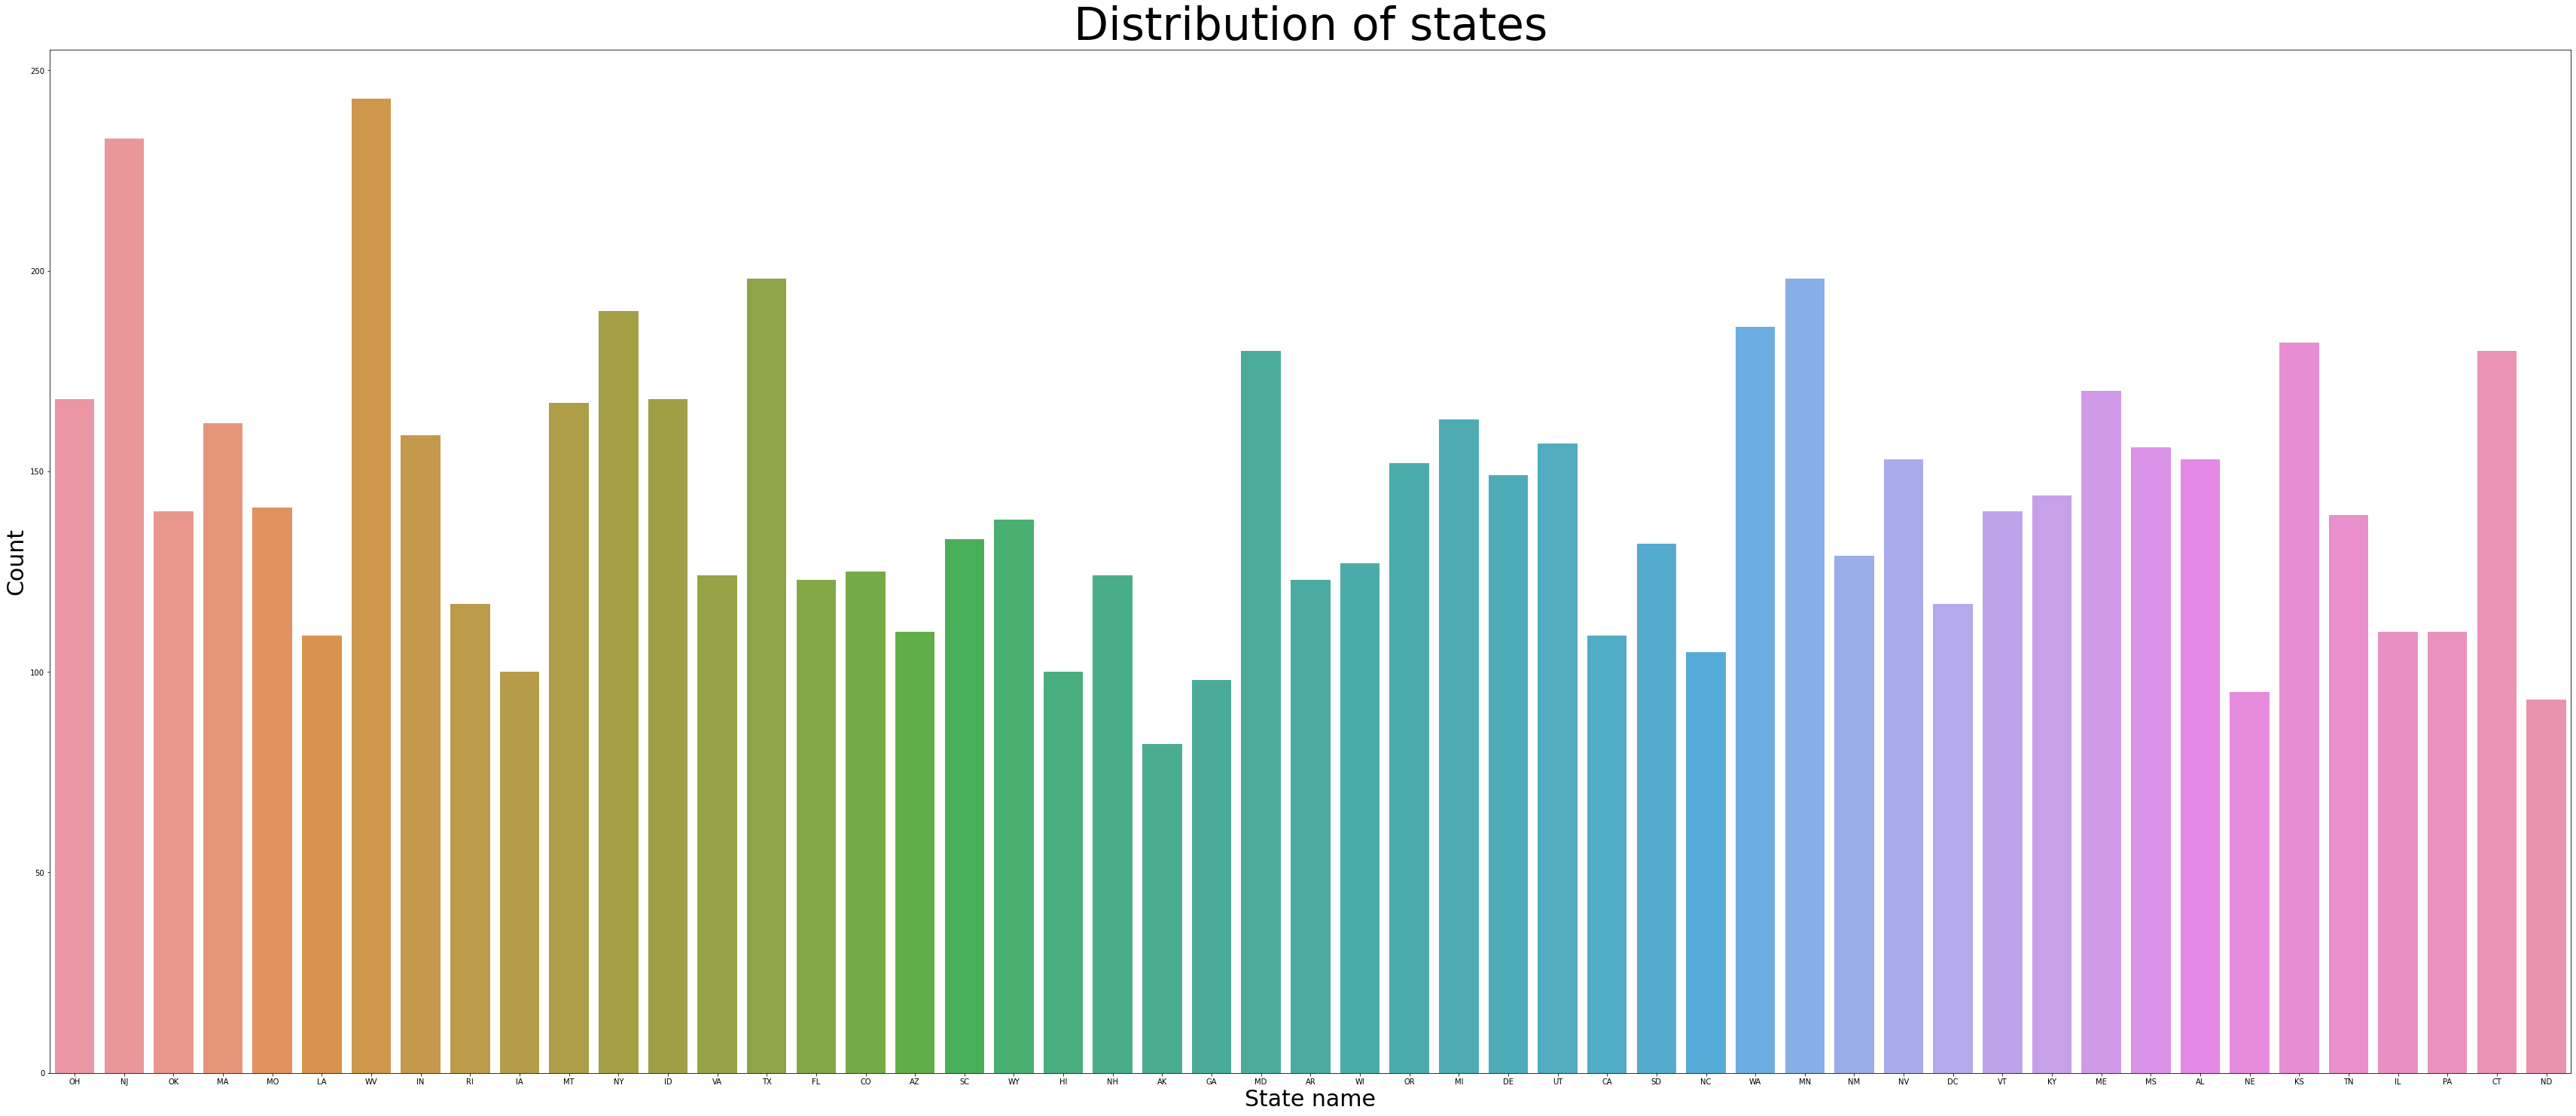

In [335]:
fig, axes = plt.subplots(figsize=(60,25))
state_dist = sns.countplot("state",data=customer_data)
state_dist.axes.set_title("Distribution of states", fontsize=60)
state_dist.set_xlabel("State name", fontsize = 30)
state_dist.set_ylabel("Count",fontsize = 30)
state_dist.tick_params(labelsize=10)

##### *Calculating the mean churn of various classes of the categorical variables to determine the predictive power of these variables*

In [336]:
customer_data[['area_code','churn']].groupby(['area_code']).mean().reset_index()

,area_code,churn
0,area_code_408,0.501068
1,area_code_415,0.493181
2,area_code_510,0.512235


In [337]:
customer_data[['voice_mail_plan','churn']].groupby(['voice_mail_plan']).mean().reset_index()

,voice_mail_plan,churn
0,no,0.544159
1,yes,0.336340


In [338]:
customer_data[['international_plan','churn']].groupby(['international_plan']).mean().reset_index()

,international_plan,churn
0,no,0.434962
1,yes,0.816212


In [339]:
customer_data[['state','churn']].groupby(['state']).mean().reset_index()

,state,churn
0,AK,0.304878
1,AL,0.424837
2,AR,0.512195
3,AZ,0.363636
4,CA,0.733945
5,CO,0.432000
6,CT,0.594444
7,DC,0.452991
8,DE,0.550336
9,FL,0.455285


There is no significant overlap in the mean churn rates for the different classes of each variable. As a result, I have decided to use all these variables in my prediction model. 

##### *Visualizing the distribution of continuous variables*

c:\Users\Niki\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='number_customer_service_calls'>

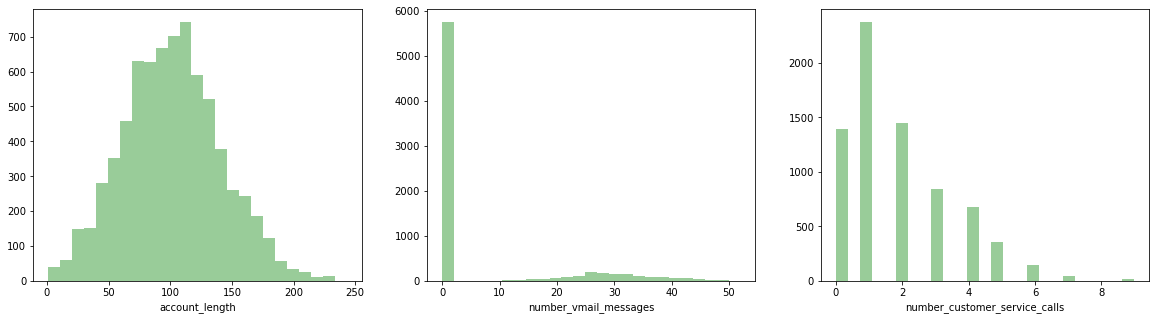

In [340]:
fig, axes = plt.subplots(1,3,figsize=(20,5))
sns.distplot(a=customer_data.account_length, bins=25, kde=False, color='green', ax=axes[0])
sns.distplot(a=customer_data.number_vmail_messages, bins=25, kde=False, color='green', ax=axes[1])
sns.distplot(a=customer_data.number_customer_service_calls, bins=25, kde=False, color='green', ax=axes[2])


<AxesSubplot:xlabel='total_intl_charge'>

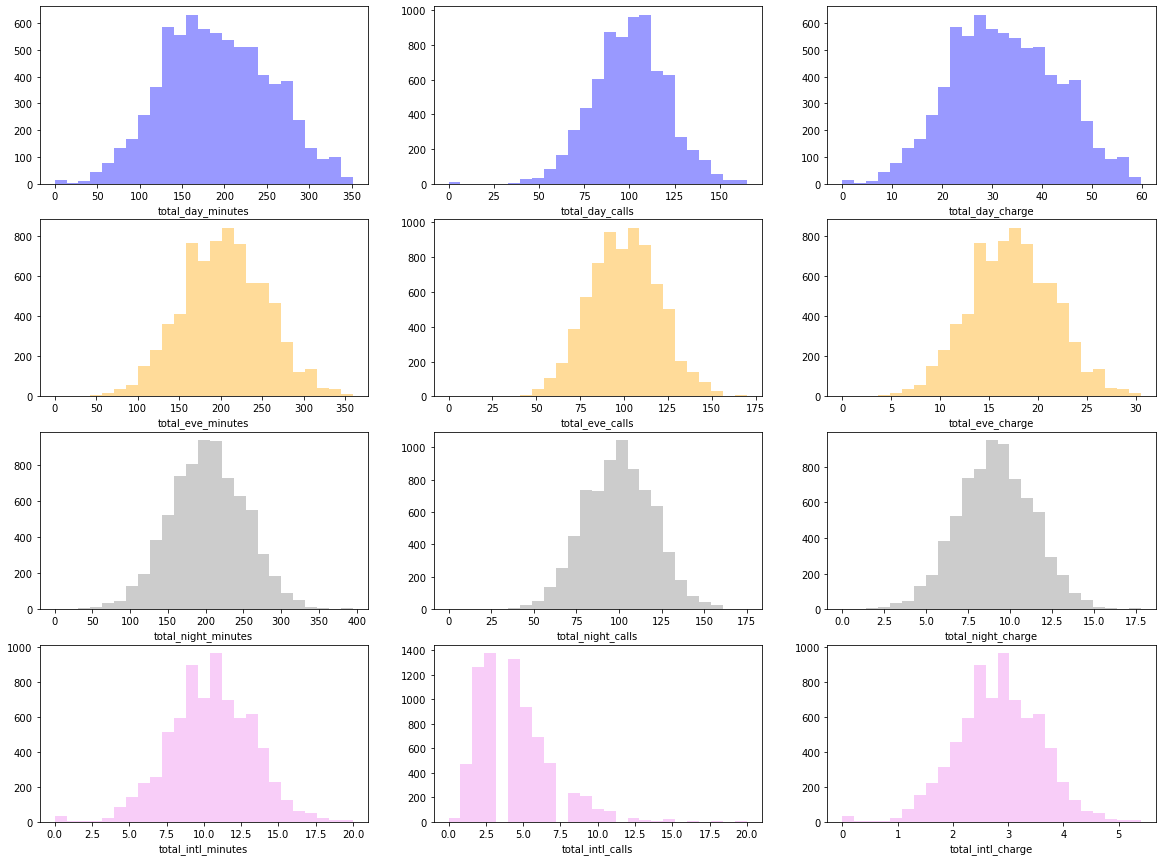

In [341]:
fig, axes = plt.subplots(4,3,figsize=(20,15))
sns.distplot(a=customer_data.total_day_minutes, bins=25, kde=False, color='blue', ax=axes[0,0])
sns.distplot(a=customer_data.total_day_calls, bins=25, kde=False, color='blue', ax=axes[0,1])
sns.distplot(a=customer_data.total_day_charge, bins=25, kde=False, color='blue', ax=axes[0,2])
sns.distplot(a=customer_data.total_eve_minutes, bins=25, kde=False, color='orange', ax=axes[1,0])
sns.distplot(a=customer_data.total_eve_calls, bins=25, kde=False, color='orange', ax=axes[1,1])
sns.distplot(a=customer_data.total_eve_charge, bins=25, kde=False, color='orange', ax=axes[1,2])
sns.distplot(a=customer_data.total_night_minutes, bins=25, kde=False, color='grey', ax=axes[2,0])
sns.distplot(a=customer_data.total_night_calls, bins=25, kde=False, color='grey', ax=axes[2,1])
sns.distplot(a=customer_data.total_night_charge, bins=25, kde=False, color='grey', ax=axes[2,2])
sns.distplot(a=customer_data.total_intl_minutes, bins=25, kde=False, color='violet', ax=axes[3,0])
sns.distplot(a=customer_data.total_intl_calls, bins=25, kde=False, color='violet', ax=axes[3,1])
sns.distplot(a=customer_data.total_intl_charge, bins=25, kde=False, color='violet', ax=axes[3,2])

##### *Using a correlation heatmap to check if there is a strong correlation between total minutes, no. of calls and total charge*

<AxesSubplot:>

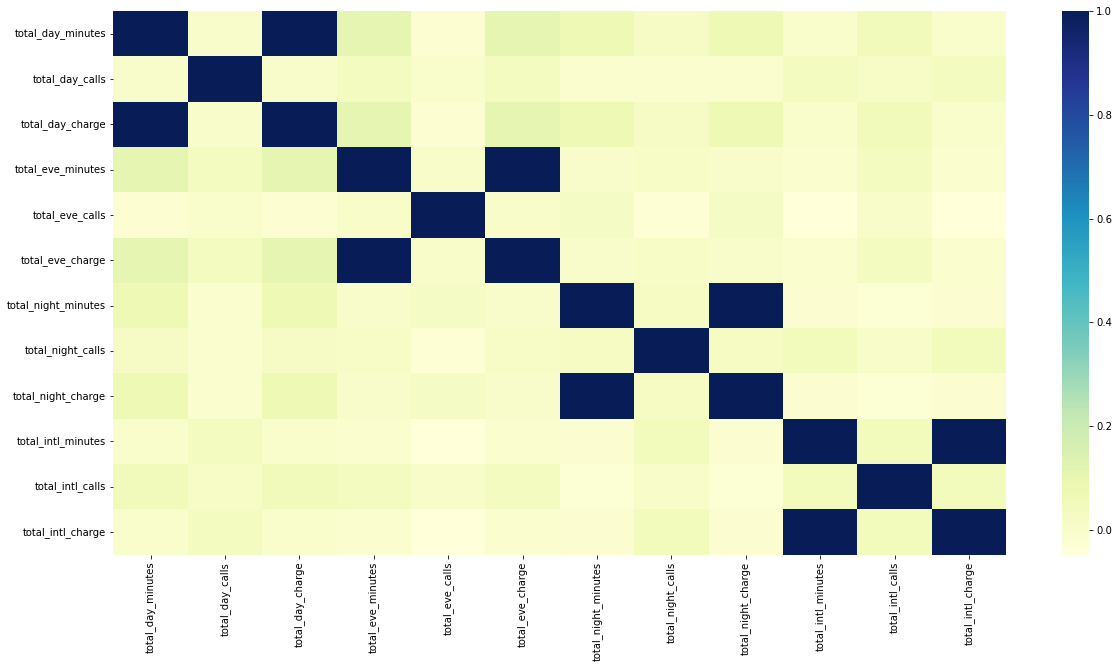

In [342]:
plt.figure(figsize=(20, 10))
corr_check = customer_data[['total_day_minutes','total_day_calls','total_day_charge','total_eve_minutes','total_eve_calls','total_eve_charge','total_night_minutes','total_night_calls','total_night_charge','total_intl_minutes','total_intl_calls','total_intl_charge']]
sns.heatmap(corr_check.corr(),cmap="YlGnBu")

We can see that the call minutes are strong correlated with total charge (which makes sense intuitively!) as total charge typically is computed as minutes * rate. Hence, it would be appropriate to drop of the two variables to avoid collinearity.  

#### **Determining the overlap of the values (for all continuous variables) for 'Churn' and 'No churn' cases**

<AxesSubplot:xlabel='churn', ylabel='total_intl_minutes'>

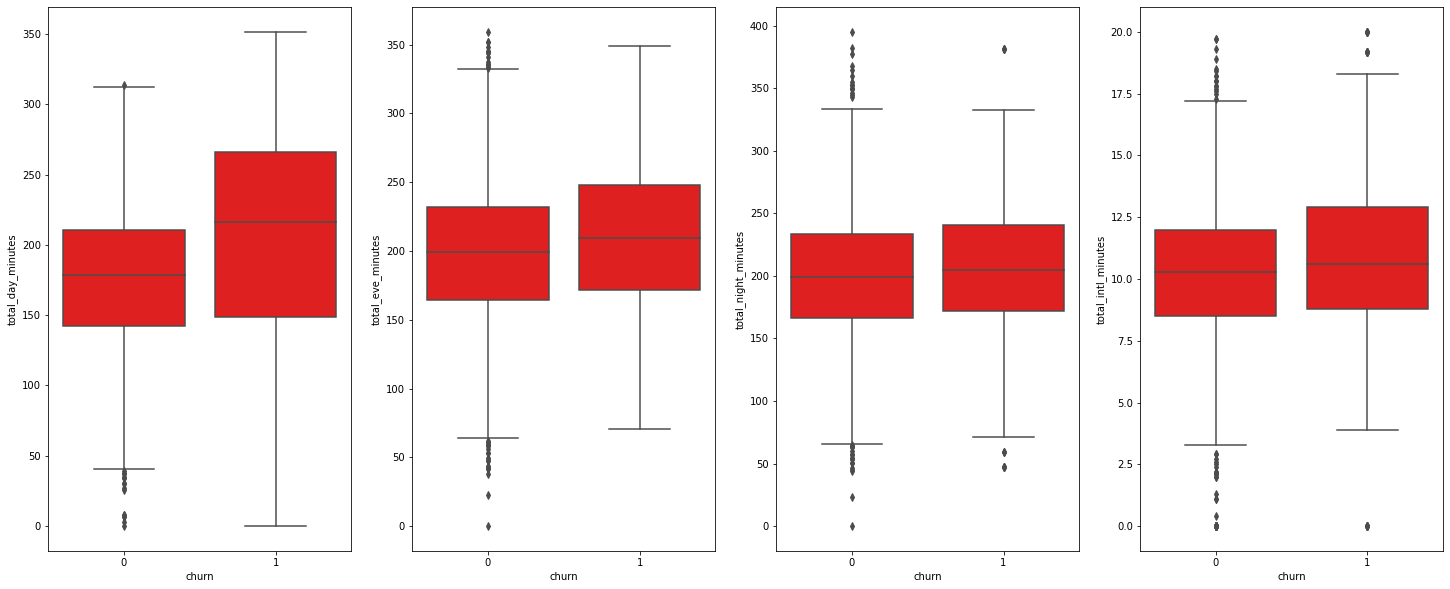

In [343]:
fig, axes = plt.subplots(1,4,figsize=(25,10))
sns.boxplot(data=customer_data, x='churn',y='total_day_minutes', color='red', ax=axes[0])
sns.boxplot(data=customer_data, x='churn',y='total_eve_minutes', color='red', ax=axes[1])
sns.boxplot(data=customer_data, x='churn',y='total_night_minutes', color='red', ax=axes[2])
sns.boxplot(data=customer_data, x='churn',y='total_intl_minutes', color='red', ax=axes[3])

<AxesSubplot:xlabel='churn', ylabel='total_intl_calls'>

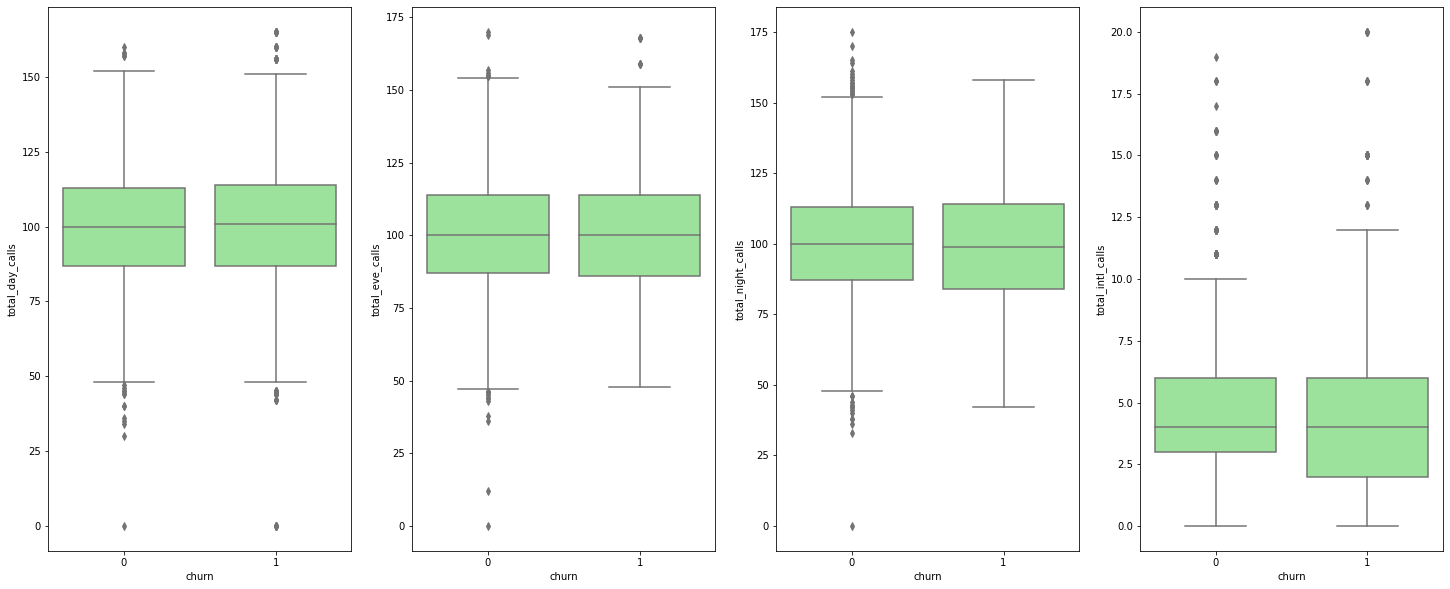

In [344]:
fig, axes = plt.subplots(1,4,figsize=(25,10))
sns.boxplot(data=customer_data, x='churn',y='total_day_calls', color='lightgreen', ax=axes[0])
sns.boxplot(data=customer_data, x='churn',y='total_eve_calls', color='lightgreen', ax=axes[1])
sns.boxplot(data=customer_data, x='churn',y='total_night_calls', color='lightgreen', ax=axes[2])
sns.boxplot(data=customer_data, x='churn',y='total_intl_calls', color='lightgreen', ax=axes[3])

From the above graphs, we can see that there is a large overlap in the values of minutes or total number of calls between both the churn & no-churn classes, indicating that total minutes & total calls, as variables, may not be good predictors of the churn. Hence, I am removing all these variables from my prediction model. I am however retaining the variable "total_day_minutes" and "total_intl_calls" as the overlap in relatively lower for these two variables.

<AxesSubplot:xlabel='churn', ylabel='account_length'>

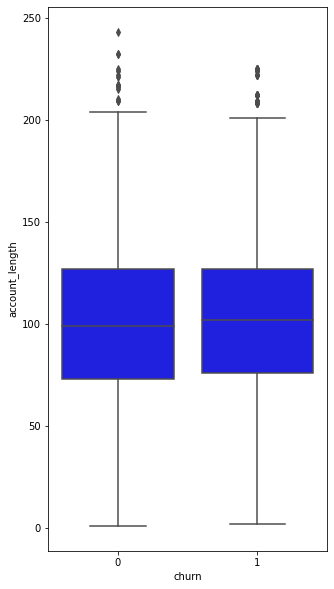

In [345]:
fig, ax = plt.subplots(figsize=(5,10))
sns.boxplot(data=customer_data, x='churn',y='account_length', color='blue')

Similarly, tenure of the customer is also not included in the model as it does not help in determining whether the customer will churn or not.

<AxesSubplot:xlabel='churn', ylabel='number_vmail_messages'>

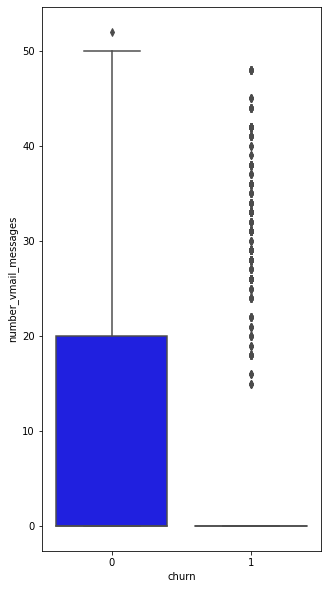

In [346]:
fig, ax = plt.subplots(figsize=(5,10))
sns.boxplot(data=customer_data, x='churn',y='number_vmail_messages', color='blue')

<AxesSubplot:xlabel='churn', ylabel='number_customer_service_calls'>

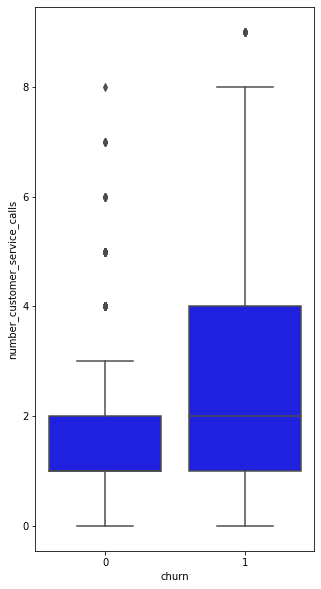

In [347]:
fig, ax = plt.subplots(figsize=(5,10))
sns.boxplot(data=customer_data, x='churn',y='number_customer_service_calls', color='blue')

#### **Standardization and One hot encoding**

In [348]:
# Splitting the data into categorical and numerical data

numerical_cols = ['total_day_minutes','total_intl_calls','number_customer_service_calls','number_vmail_messages']
categorical_cols = ['area_code', 'international_plan','voice_mail_plan','state']
X_train_numerical = customer_data.loc[:,numerical_cols]
X_train_categorical = customer_data.loc[:,categorical_cols]
Y_train = customer_data.loc[:,'churn']


In [349]:
# Standardization on the training dataset

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
sc = StandardScaler()
X_train_numeric_sc = pd.DataFrame(sc.fit_transform(X_train_numerical),columns = X_train_numerical.columns)

# One hot encoding on the train dataset

ohe = OneHotEncoder()
encoded_X_train = ohe.fit_transform(X_train_categorical).toarray()
X_train_categorical_ohe = pd.DataFrame(encoded_X_train, columns = ohe.get_feature_names_out(X_train_categorical.columns))
X_train_merged = pd.concat([X_train_numeric_sc, X_train_categorical_ohe], axis = 1)
X_train_merged.head()

,total_day_minutes,total_intl_calls,number_customer_service_calls,number_vmail_messages,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,-0.474911,-0.535995,-0.539747,1.534375,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.832673,0.255055,-1.160096,-0.498130,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.727841,1.046106,0.080601,-0.498130,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.393387,-0.535995,0.700950,-0.498130,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.429848,1.046106,0.700950,1.378028,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [350]:
# Importing the test dataset
customer_data_test = pd.read_csv('test.csv')
customer_data_test.head()


,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [351]:
X_test_numerical = customer_data_test[numerical_cols]
X_test_categorical = customer_data_test[categorical_cols]

# Standardizing and one-hot-encoding the test dataset

X_test_numerical_sc = pd.DataFrame(sc.transform(X_test_numerical), columns = X_test_numerical.columns)
encoded_X_test = ohe.transform(X_test_categorical).toarray()
X_test_categorical_ohe = pd.DataFrame(encoded_X_test,columns = ohe.get_feature_names_out(X_test_categorical.columns))
X_test_merged = pd.concat([X_test_numerical_sc, X_test_categorical_ohe], axis=1)
X_test_merged.head()

,total_day_minutes,total_intl_calls,number_customer_service_calls,number_vmail_messages,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,1.179550,-0.535995,-0.539747,1.456202,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.512970,0.650581,-1.160096,-0.498130,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.128703,0.650581,1.321298,-0.498130,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.009743,-0.535995,0.700950,-0.498130,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-1.071156,0.255055,0.700950,-0.498130,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


*Splitting training data into training and validation set (70:30 ratio) (the code has been provided)*

In [352]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_merged, Y_train, test_size=0.3, random_state=42)

In [353]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((5112, 62), (2192, 62), (5112,), (2192,))

### **Modelling with Logistic Regression**

In [354]:
from sklearn.linear_model import LogisticRegression


In [355]:
# Initializing the classifier with default parameters
# then fitting the classifier on training data and labels
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [356]:
# predict the output for validation dataset
y_preds_logreg = lr.predict(X_val)

*Plotting ROC curve and obtain AUC for predictions on the validation data*

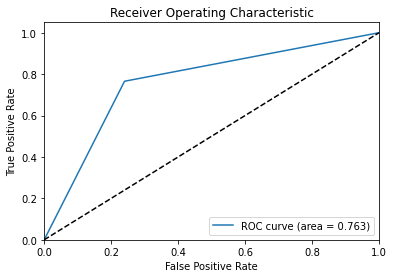

In [357]:
# Plot the ROC curve by giving appropriate names for title and axes. 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

probs = lr.predict_proba(X_val)
preds = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_val, y_preds_logreg)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [358]:
# Calculating the accuracy, precision & recall on the validation dataset

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [359]:
accuracy_logreg = round(accuracy_score(y_val, y_preds_logreg)* 100, 4)
precision_logreg = round(precision_score(y_val, y_preds_logreg)* 100, 4)
recall_logreg = round(recall_score(y_val, y_preds_logreg)* 100, 4)
F1_logreg = round(f1_score(y_val, y_preds_logreg)* 100, 4)
auc_logreg = round(auc(fpr, tpr)*100 ,4)


### **Modelling with Decision Trees**

In [360]:
from sklearn.tree import DecisionTreeClassifier

In [361]:
### Fit the classifier on the training data
dt = DecisionTreeClassifier(random_state = 30)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=30)

In [362]:
### Make predictions on validation data
y_preds_dt = dt.predict(X_val)

*Plotting ROC curve and obtain AUC for predictions on the validation data*

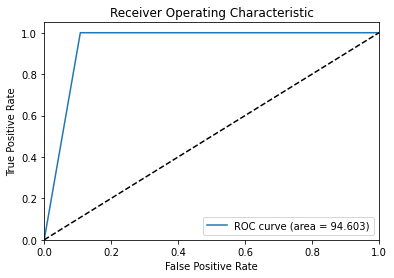

In [363]:
# Plot the ROC curve by giving appropriate names for title and axes. 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

probs = dt.predict_proba(X_val)
preds = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_val, y_preds_dt)
roc_auc = auc(fpr, tpr) * 100

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

*Computing various performance metrics for the decision tree*

In [364]:
accuracy_dt = round(accuracy_score(y_val, y_preds_dt)* 100, 4)
precision_dt = round(precision_score(y_val, y_preds_dt)* 100, 4)
recall_dt = round(recall_score(y_val, y_preds_dt)* 100, 4)
F1_dt = round(f1_score(y_val, y_preds_dt)* 100, 4)
auc_dt = round(auc(fpr, tpr)*100,4)


### **Modelling with Random Forest**

In [365]:
from sklearn.ensemble import RandomForestClassifier
### Fit the classifier on the training data
# Please set random_state=30
rf = RandomForestClassifier(random_state = 30)
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(random_state=30)

In [366]:
### Make predictions on the training data
y_preds_rf = rf.predict(X_val)

*Plotting ROC curve and obtain AUC for predictions on the validation data*

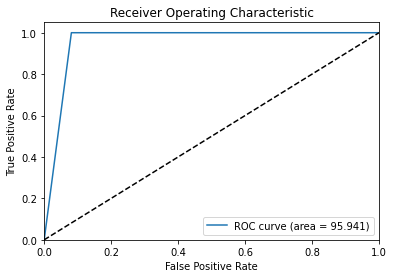

In [367]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

probs = dt.predict_proba(X_val)
preds = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_val, y_preds_rf)
roc_auc = auc(fpr, tpr) * 100

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

*Computing various performance metrics for the decision tree*

In [368]:
accuracy_rf = round(accuracy_score(y_val, y_preds_rf)* 100, 4)
precision_rf = round(precision_score(y_val, y_preds_rf)* 100, 4)
recall_rf = round(recall_score(y_val, y_preds_rf)* 100, 4)
F1_rf = round(f1_score(y_val, y_preds_rf)* 100, 4)
auc_rf = round(auc(fpr, tpr)*100,4)

### **Evaluating model performance**

In [369]:
model_perf_dict = {
    'Logsitic Regression': [accuracy_logreg, precision_logreg, recall_logreg, F1_logreg, auc_logreg],
    'Decision Tree': [accuracy_dt, precision_dt, recall_dt, F1_dt, auc_dt],
    'Random Forest': [accuracy_rf, precision_rf, recall_rf, F1_rf, auc_rf],
}

col_names = ['Accuracy','Precision','Recall','F1 Score','AUC']

In [370]:
df_model_perf = pd.DataFrame.from_dict(model_perf_dict, orient='index', columns= col_names)
df_model_perf

,Accuracy,Precision,Recall,F1 Score,AUC
Logsitic Regression,76.2774,75.2984,76.564,75.9259,76.2838
Decision Tree,94.4799,89.8490,100.000,94.6531,94.6030
Random Forest,95.8485,92.1687,100.000,95.9248,95.9411
